# 02_Diffraction Sorting 

SSA adapted and developed from original code provided by Beth Galtry

first step: organise raw diffraction data into usable folders - i.e. by run 


output: sorted list of files to undergo analysis - moves files into diffraction and potential background folders  

worth noting these files do not take into consideration calibration file 

In [1]:
#beth - unctouched 
# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import matplotlib as mpl

In [9]:
#beth - untouched  
#read in all nxs file names in given directory
# directory needs "/" not "\" and a "/" on the end
directory = "D:/I11 Beamtime July/RAW_2D/Run_8_X2_0.5VF/"
nxs_count = 0
nxs_files = []

# Count the number of .nxs files in directory
for files in os.listdir(directory):
    filename = os.fsdecode(files)
    if filename.endswith(".nxs"):
        nxs_files.append(filename)
        nxs_count += 1
print('File count:', nxs_count)

File count: 70


In [10]:
#create processing info folder for bar charts and hit rate files later 
#beth -untouched 
processing_folder = "processing_info/"
processing_path = os.path.join(directory,processing_folder)


if not os.path.exists(processing_path):
    os.makedirs(processing_path)

In [11]:
#scarlett
#extract and standardise all raw diffraction frames from.nxs 
#states file format and checks back that all of the file count from earlier being read correctly. 


# --- Step 1: Inspect the first file to find the dataset path ---
test_file = os.path.join(directory, nxs_files[0])
print("Inspecting:", test_file)

with h5py.File(test_file, "r") as f:
    def printname(name):
        print(name)
    f.visit(printname)        # <-- run this cell, look at the printed tree

# Look in the output for the detector dataset, often something like:
#    entry1/pixium_hdf/data
# or  entry/data/counts
# Copy that full path (including the leading /) for use below.


# --- Step 2: After you identify the correct dataset path, put it here:
dataset_path = "/entry1/pixium_hdf/data"     # <-- CHANGE this after inspecting



# --- Step 3: Load all frames ---
frame_sized = np.zeros((nxs_count, 2881, 2880), dtype=np.float32)

for i, fname in enumerate(nxs_files):
    file_path = os.path.join(directory, fname)
    with h5py.File(file_path, "r") as f:
        data = f[dataset_path][()]
        # adjust reshape if needed
        if data.ndim == 3:
            # e.g. shape (1, 2881, 2880)
            data = data[0]
        frame_sized[i] = data

print("All frames loaded:", frame_sized.shape)

Inspecting: D:/I11 Beamtime July/RAW_2D/Run_8_X2_0.5VF/i11-1-108045.nxs
entry1
entry1/before_scan
entry1/before_scan/pixium10_BaseExposure
entry1/before_scan/pixium10_ExcludeEarlyFrames
entry1/before_scan/pixium10_PUMode
entry1/before_scan/pixium10_TotalCount
entry1/before_scan/pixium10_TriggerMode
entry1/calibrant
entry1/calibrant/name
entry1/end_time
entry1/entry_identifier
entry1/experiment_identifier
entry1/instrument
entry1/instrument/ds
entry1/instrument/ds/ds
entry1/instrument/ds/soft_limit_max
entry1/instrument/ds/soft_limit_min
entry1/instrument/name
entry1/instrument/pixium_hdf
entry1/instrument/pixium_hdf/count_time
entry1/instrument/pixium_hdf/local_name
entry1/instrument/pixium_hdf/x_pixel_size
entry1/instrument/pixium_hdf/y_pixel_size
entry1/instrument/source
entry1/instrument/source/name
entry1/instrument/source/probe
entry1/instrument/source/type
entry1/pixium_hdf
entry1/poni
entry1/program_name
entry1/sample
entry1/sample/beam_size_x
entry1/sample/beam_size_y
entry1/sa

In [12]:
#beth -untouched 
# read in all frames in directory into a numpy array
#reads diffraction image frames and stacks them into a single numpy array for further processing 


frame_sized = np.zeros((nxs_count, 2881, 2880))  #<<---change values based on pixium dimensions 
a = 0

while a < nxs_count:
    with h5py.File(directory+nxs_files[a], 'r') as dat:
      nxs_frame = np.array(dat["/entry1/pixium_hdf/data"][()][:]) 
      frame_sized[a] = nxs_frame.reshape(nxs_frame.shape[1:])
      a += 1

In [13]:
#scarlett 
#if error with sizing, run this code - states which files are causing the issue 

#for a, file in enumerate(nxs_files):
 #   try:
#        with h5py.File(directory + file, 'r') as dat:
#            nxs_frame = np.array(dat["/entry1/pixium_hdf/data"][()])
#            frame_sized[a] = nxs_frame.reshape(nxs_frame.shape[1:])
#            
#    except ValueError as e:
#         print(f"❌ Error with file: {file}")
#         print(f"   Array shape: {nxs_frame.shape if 'nxs_frame' in locals() else 'unknown'}")
#         print(f"   Error: {e}")


In [14]:
#scarlett - changes made 
# select value of the "5th" (or other, based on pixel_intensity_no) most intense pixel
# print those pixel intensities

pixel_intensity_no = 5  #<<--- change this depending on data set 

#calculate correct number of pixels per frame 

pixels_per_frame = frame_sized[0].size 
#print (pixels_per_frame)
# for 2881X2880 = 8297280

# allocate arrays correctly 

flat_intensities = np.zeros((nxs_count, pixels_per_frame))
#flat_intensities = np.zeros((nxs_count, 2075040))
pixel_values = np.zeros((nxs_count,))

b = 0

while b < nxs_count:
    flat_intensities[b] = frame_sized[b].flatten()
    flat_intensities[b].sort()
    pixel_values[b] = flat_intensities[b][-pixel_intensity_no]
    b += 1
    
print(pixel_values)

[ 1734.  1775.  1267.  1696.  1138. 15564.  1676.  1252.  1712.  1359.
  1569.  1697.  1403.  1756.  1165.  1713.  1759.  1392.  1730.  1273.
  1672.  1109.  1790.  1212.  1730.  1274.  1576.  1280.  1196.  1742.
  1278.  1310.  2084.  1669.  1774.  1754.  1659.  1589.  1567.  1574.
  1477.  1319.  1629.  1500.  1719.  1582.  1274.  1377.  1678.  1656.
  1135.  1391.  1671.  1796.  1610.  1210.  1637.  1793.  1732.  1671.
  1670.  1289.  1534.  1657.  1277.  1495.  1735.  1357.  8982.  2317.]


In [15]:
#SSA code 
#used to rename files for plot
#adaptations i've added - got rid of hard coded limits for string length from beths code 


#extract just last folder name from directory path 
datasets_name = os.path.basename(os.path.normpath(directory))

#replace "/" with "-" incase of subfolders within directory 
modified_datasets_name = datasets_name.replace("/", "_")
plot_name = f"{modified_datasets_name}_{pixel_intensity_no}th_I_plot.png"
plot_directory = os.path.join(directory, plot_name)

print (modified_datasets_name)
print (plot_name)
print (plot_directory)

Run_8_X2_0.5VF
Run_8_X2_0.5VF_5th_I_plot.png
D:/I11 Beamtime July/RAW_2D/Run_8_X2_0.5VF/Run_8_X2_0.5VF_5th_I_plot.png


In [16]:
#scarlett code 
# Optional: load a detector mask
# Replace the path with your mask file if you have one
# mask_array should be a 2D array, 1 = good pixel, 0 = bad pixel

# Path to the directory containing the mask
mask_directory = "D:/I11 Beamtime July/"  # replace with your folder path
mask_filename = "calib_kap_mask.npy"                  # or mask.png, mask.tif, etc.
mask_path = os.path.join(mask_directory, mask_filename)

# Initialize mask_array
mask_array = None

# Check if mask file exists
if os.path.exists(mask_path):
    print(f"Loading mask from: {mask_path}")
    
    # Determine file type by extension
    ext = os.path.splitext(mask_filename)[1].lower()
    
    if ext == ".npy":
        mask_array = np.load(mask_path)
    elif ext in [".png", ".tif", ".tiff"]:
        mask_image = Image.open(mask_path)
        mask_array = np.array(mask_image)
        mask_array = (mask_array > 0).astype(int)  # ensure binary mask
    else:
        print("Mask file type not recognized. Please use .npy, .png, or .tif")
    
    print("Mask loaded. Shape:", mask_array.shape)
    print("Unique values in mask:", np.unique(mask_array))
else:
    print("No mask file found. Proceeding without a mask.")
    mask_array = None


Loading mask from: D:/I11 Beamtime July/calib_kap_mask.npy
Mask loaded. Shape: (2881, 2880)
Unique values in mask: [0 1]


In [17]:
# scarlett code -pixel intensities and masking 
# define robust nth pixxel function -- n can be altered 
def robust_nth_pixel(frame, n=5, percentile_cut=99.9, mask=None):
    """
    Returns the nth most intense pixel in a frame, ignoring extreme outliers.
    
    frame : 2D numpy array
        Single detector frame
    n : int
        Which brightest pixel to return
    percentile_cut : float
        Percentile above which pixels are ignored (to remove cosmic rays)
    mask : 2D numpy array, optional
        Boolean or 0/1 mask to ignore known bad pixels
    """
    pixels = frame.ravel()
    
    # Apply mask if provided
    if mask is not None:
        pixels = pixels[mask.ravel() > 0]  # only include valid pixels

    # Remove extreme high pixels
    threshold = np.percentile(pixels, percentile_cut)
    pixels_clipped = pixels[pixels < threshold]
    
    # Sort descending
    sorted_pixels = np.sort(pixels_clipped)[::-1]
    
    # Return nth largest
    return sorted_pixels[n-1]  # 0-indexed


In [18]:
#scarlett code adaptations
#pixel intenisties and masking 
# pixel_intensity_no = which brightest pixel you want to track, e.g., 5
pixel_intensity_no = 5

# frame_sized should already be loaded as a 3D array: (frames, height, width)
pixel_values = [
    robust_nth_pixel(frame_sized[i], n=pixel_intensity_no, mask=mask_array) 
    for i in range(len(frame_sized))
]


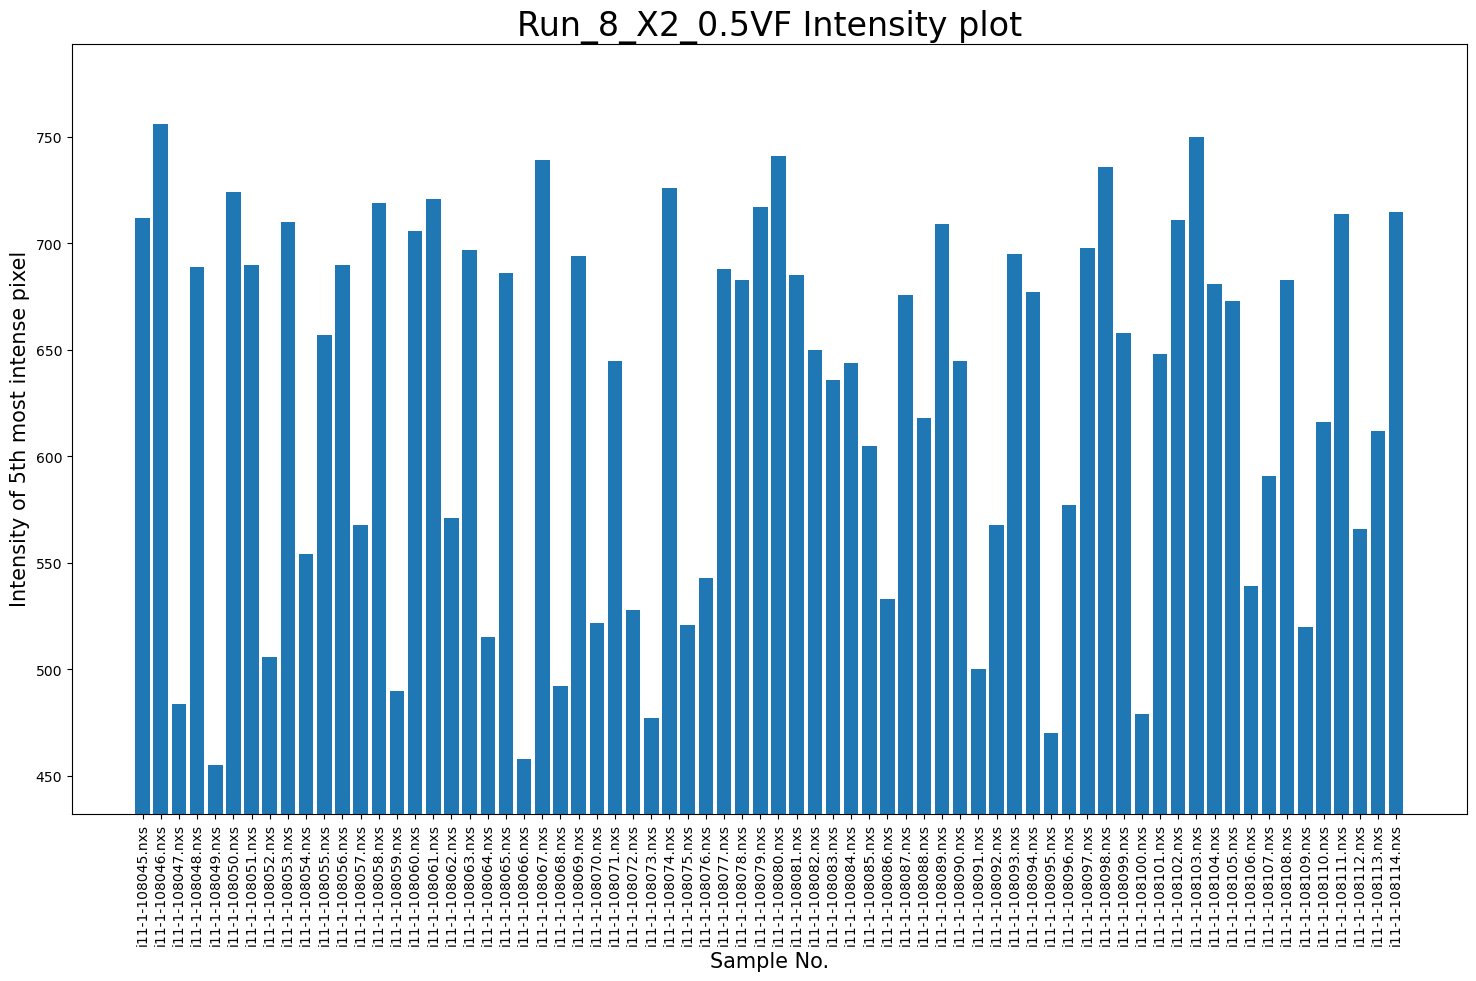

In [19]:
#scarlett code adaptations 
#plot bar chart as a function of intensity 
plt.rcParams["figure.figsize"] = 18, 10
plt.title(datasets_name + " Intensity plot", fontsize=24)
plt.bar(nxs_files, pixel_values, width=0.8, align='center')
plt.xticks(range(len(nxs_files)), nxs_files, rotation='vertical')
plt.xlabel('Sample No.', fontsize=15)
plt.ylabel('Intensity of '+str(pixel_intensity_no)+'th most intense pixel', fontsize=15)

# Autoscale around data
plt.ylim(min(pixel_values) * 0.95, max(pixel_values) * 1.05)

plt.savefig(processing_path + plot_name)
plt.show()


In [20]:
#beth code 
# read in hdf file names
hdf_count = 0
hdf_files = []

for files2 in os.listdir(directory):
    filename2 = os.fsdecode(files2)
    if filename2.endswith(".hdf"):
        hdf_files.append(filename2)
        hdf_count += 1

# Each row will be [nxs_file, pixel_value, hdf_file]
names_values = np.array(list(zip(nxs_files, pixel_values, hdf_files)))
print (names_values)  

[['i11-1-108045.nxs' '712.0' 'pixium_108045.hdf']
 ['i11-1-108046.nxs' '756.0' 'pixium_108046.hdf']
 ['i11-1-108047.nxs' '484.0' 'pixium_108047.hdf']
 ['i11-1-108048.nxs' '689.0' 'pixium_108048.hdf']
 ['i11-1-108049.nxs' '455.0' 'pixium_108049.hdf']
 ['i11-1-108050.nxs' '724.0' 'pixium_108050.hdf']
 ['i11-1-108051.nxs' '690.0' 'pixium_108051.hdf']
 ['i11-1-108052.nxs' '506.0' 'pixium_108052.hdf']
 ['i11-1-108053.nxs' '710.0' 'pixium_108053.hdf']
 ['i11-1-108054.nxs' '554.0' 'pixium_108054.hdf']
 ['i11-1-108055.nxs' '657.0' 'pixium_108055.hdf']
 ['i11-1-108056.nxs' '690.0' 'pixium_108056.hdf']
 ['i11-1-108057.nxs' '568.0' 'pixium_108057.hdf']
 ['i11-1-108058.nxs' '719.0' 'pixium_108058.hdf']
 ['i11-1-108059.nxs' '490.0' 'pixium_108059.hdf']
 ['i11-1-108060.nxs' '706.0' 'pixium_108060.hdf']
 ['i11-1-108061.nxs' '721.0' 'pixium_108061.hdf']
 ['i11-1-108062.nxs' '571.0' 'pixium_108062.hdf']
 ['i11-1-108063.nxs' '697.0' 'pixium_108063.hdf']
 ['i11-1-108064.nxs' '515.0' 'pixium_108064.hdf']


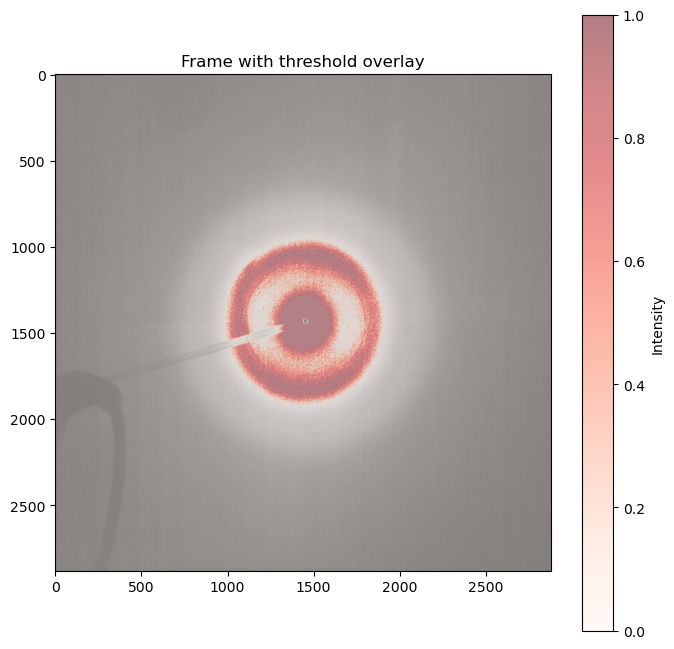

Threshold used: 99.13


In [21]:
#scarlett code
#value for spot threshold to be used in the next cell

# define overlay function
def overlay_mask(frame, mask, alpha=0.5):
    plt.figure(figsize=(8,8))
    plt.imshow(frame, cmap='gray', vmax=np.percentile(frame,99))
    plt.imshow(mask, cmap='Reds', alpha=alpha)
    plt.colorbar(label='Intensity')
    plt.title('Frame with threshold overlay')
    plt.show()

# pick a frame to test
frame_idx = 0
frame = frame_sized[frame_idx]

# compute robust threshold: median + 5*sigma_est
median = np.median(frame)
mad = np.median(np.abs(frame - median))  # median absolute deviation
sigma_est = 1.4826 * mad                 # approximate sigma
cand_median_plus = median + 5 * sigma_est  # robust threshold

# create mask using this threshold
mask = frame > cand_median_plus

# visualize overlay
overlay_mask(frame, mask)

print("Threshold used:", cand_median_plus)

In [ ]:
#beth code 
# threshold potential backgrounds/diffraction frames with spots_threshold
# list the number of potential backgrounds and names of these

# change spots threshold to desired cut off for diffraction/background

spots_threshold = 730

diffraction_frames = []
diffraction_hdf = []
background_frames = []
background_hdf = []

c = 0
while c < nxs_count:
    # pixel value is in column 1
    if float(names_values[c, 1]) > spots_threshold:
        diffraction_frames.append(names_values[c, 0])  # nxs filename
        diffraction_hdf.append(names_values[c, 2])     # hdf filename
    else:
        background_frames.append(names_values[c, 0])   # nxs filename
        background_hdf.append(names_values[c, 2])      # hdf filename

    # increment once after both branches
    c += 1

print('Number of potential background frames:', len(background_frames))
background_frames


In [22]:
# scarlett 
#set up backgrounds folder 

backgrounds_folder = "Potential backgrounds/"
bg_path = os.path.join(directory, backgrounds_folder)
os.makedirs(bg_path, exist_ok=True)


In [ ]:
#scarlett 
#function to get numeric suffix

import re

def get_last_three_digits(filename):
    """
    Extract the last three consecutive digits from the filename (before extension)
    Example: 'run001_frame005.nxs' -> '005'
    """
    base = os.path.splitext(filename)[0]  # remove extension
    match = re.findall(r'(\d{3})', base)  # find all groups of 3 digits
    return match[-1] if match else None   # take the last one


In [ ]:
#scarlett
#matching hdf to nxs and mving to background folder 

for nxs_file in background_frames:
    # Move the .nxs file
    src_nxs = os.path.join(directory, nxs_file)
    dst_nxs = os.path.join(bg_path, nxs_file)
    if os.path.exists(src_nxs):
        os.replace(src_nxs, dst_nxs)
    
    # Extract last three digits from the nxs file
    nxs_id = get_last_three_digits(nxs_file)
    
    # Find any hdf file containing the same last three digits
    matching_hdf = [f for f in background_hdf if get_last_three_digits(f) == nxs_id]
    
    # Move matched hdf file(s)
    for hdf_file in matching_hdf:
        src_hdf = os.path.join(directory, hdf_file)
        dst_hdf = os.path.join(bg_path, hdf_file)
        if os.path.exists(src_hdf):
            os.replace(src_hdf, dst_hdf)


In [ ]:
#scarlett 
# List files in the backgrounds folder
bg_files = os.listdir(bg_path)

# Count .nxs and .hdf files
nxs_count = len([f for f in bg_files if f.endswith('.nxs')])
hdf_count = len([f for f in bg_files if f.endswith('.hdf')])

print(f"Total files in '{backgrounds_folder}': {len(bg_files)}")
print(f" - .nxs files: {nxs_count}")
print(f" - .hdf files: {hdf_count}")

# Optionally, print a few filenames for confirmation
print("\nSample of moved files:")
print(bg_files[:10])  # prints first 10 filenames


# Check in DAWN - manually sort into correct folders 

from the previous code - the frames should already by placed in the correct folder if it is a background - but double checking is wise to make sure no diffraction is lost and no background is being analysed as having data.

DAWN download: https://dawnsci.org/

In [ ]:
#beth code 
diff_count = 0

for files in os.listdir(directory):
    filename = os.fsdecode(files)
    if filename.endswith(".nxs"):
        diff_count += 1
print('Sorted diffraction frames:', diff_count)


bg_count = 0

for files in os.listdir(bg_path):
    filename = os.fsdecode(files)
    if filename.endswith(".nxs"):
        bg_count += 1
print('Sorted background frames:', bg_count)

In [ ]:
# ------------------------------
# Hit rate calculation
# ------------------------------

# Total number of sorted frames
total_sorted = diff_count + bg_count

if total_sorted > 0:
    hit_rate = round((diff_count / total_sorted) * 100, 1)
else:
    hit_rate = 0  # avoid division by zero

hit_rate_text = f"{hit_rate}%"
print(f"Hit rate (diffraction frames as % of total sorted frames): {hit_rate_text}")


In [ ]:
#beth code
output_file_path = processing_path + modified_datasets_name+ "_hit_rates.txt"

with open(output_file_path, 'w') as file:
    file.write(f"Datasets location: {directory}\n\n")
    file.write(f"Total frames:   {nxs_count}\n\n")
    file.write(f"Pixel intensity number: {pixel_intensity_no}\n")
    file.write(f"Spots threshold: {spots_threshold}\n")
    file.write(f"Number of thresholded background frames: {str(len(background_frames))}\n\n")
    file.write(f"Frames with diffraction:    {diff_count} \n")
    file.write(f"Sorted background frames:    {bg_count} \n\n")
    file.write(f"Hit rate:    {hit_rate_text} \n\n")